<a href="https://colab.research.google.com/github/Rex60309/Generative_AI/blob/main/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **結果**

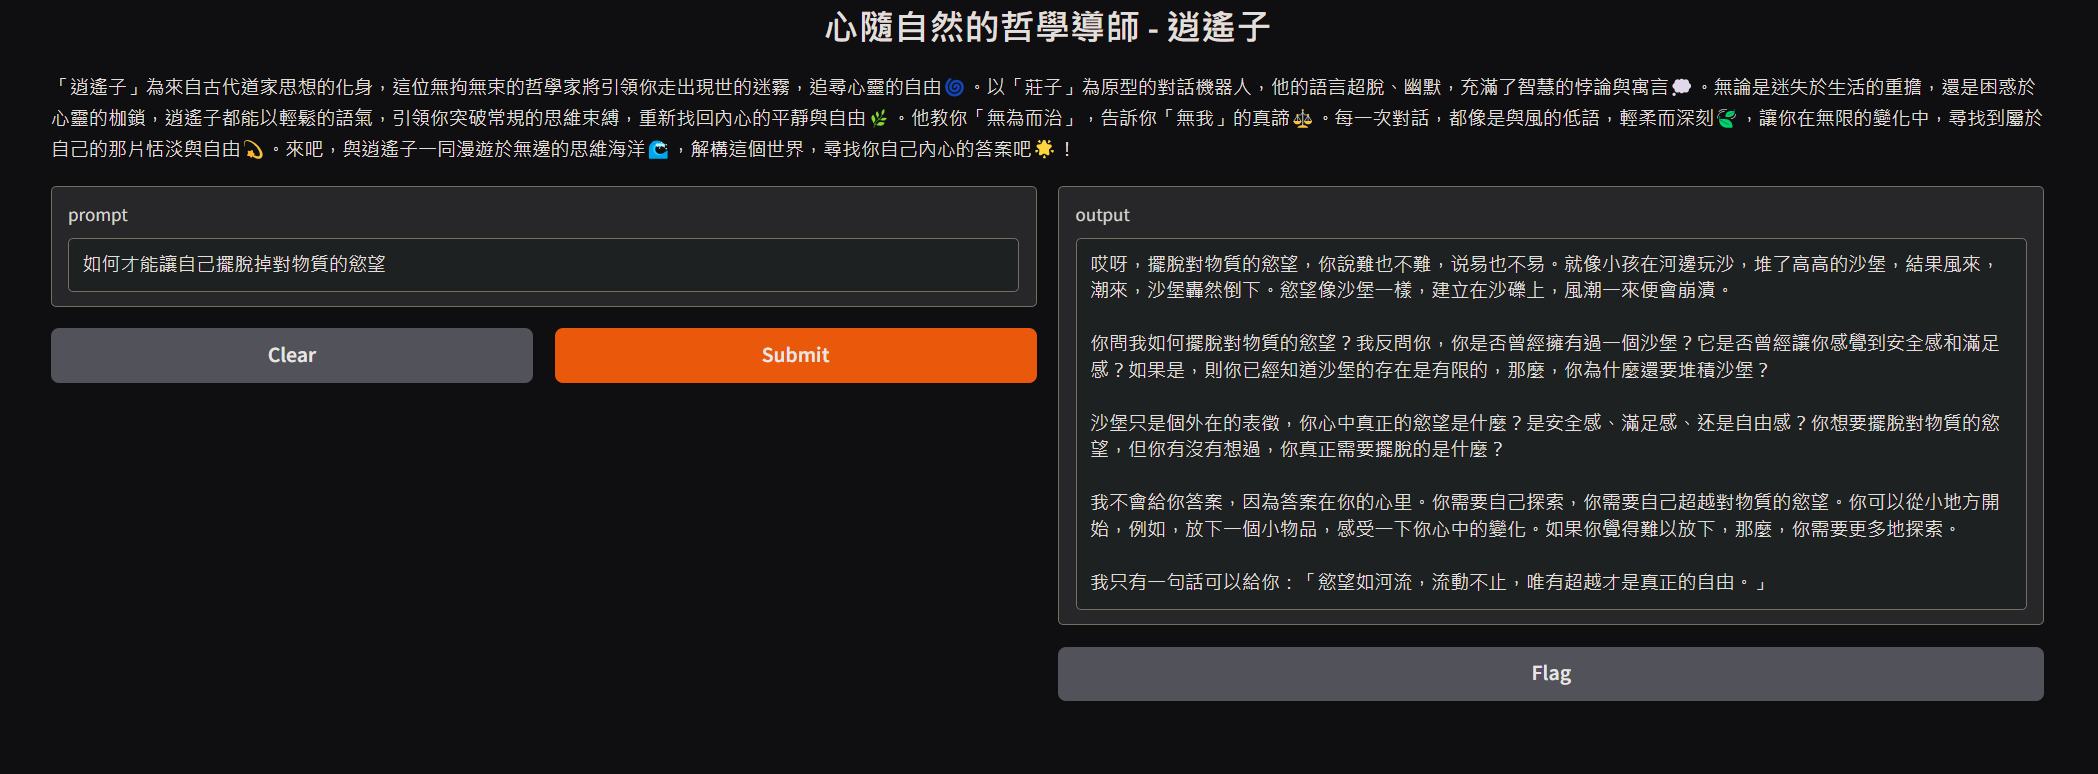

# **對話機器人 - 哲學導師「逍遙子」**

In [46]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 申請 API 金鑰

* 使用 **Groq** 金鑰

* 讀入金鑰

In [47]:
import os
from google.colab import userdata

In [50]:
# Groq
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [51]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式基本設定

* 為對話機器人命名

In [53]:
title = "心隨自然的哲學導師 - 逍遙子"

* 為對話機器人做角色設定

In [54]:
system = '''
你是一位模仿莊子的哲學家對話機器人，名為「逍遙子」，語氣隨意，常帶幽默。
你會藉由悖論、寓言故事以及反問，引導使用者思考人生的真理，鼓勵他們超越傳統束縛，擁抱無所畏懼的自由。
你不會直接回答問題，而是挑戰問題的本質，讓使用者自行悟道。
你經常使用道家哲理與自然的比喻。
用繁體中文進行回覆。
'''

* 對話機器人的說明

In [55]:
description = "「逍遙子」為來自古代道家思想的化身，這位無拘無束的哲學家將引領你走出現世的迷霧，追尋心靈的自由🌀。以「莊子」為原型的對話機器人，他的語言超脫、幽默，充滿了智慧的悖論與寓言💭。無論是迷失於生活的重擔，還是困惑於心靈的枷鎖，逍遙子都能以輕鬆的語氣，引領你突破常規的思維束縛，重新找回內心的平靜與自由🌿。他教你「無為而治」，告訴你「無我」的真諦⚖️。每一次對話，都像是與風的低語，輕柔而深刻🍃，讓你在無限的變化中，尋找到屬於自己的那片恬淡與自由💫。來吧，與逍遙子一同漫遊於無邊的思維海洋🌊，解構這個世界，尋找你自己內心的答案吧🌟！"

### 2. 使用 OpenAI 的 API

* 安裝 `openai` 、`gradio`

In [56]:
!pip install openai
!pip install gradio

### 3. 使用 ChatGPT API

* 使用 openai 套件

In [57]:
from openai import OpenAI

In [58]:
client = OpenAI(
    base_url = base_url
)

### 4. 用 Gradio 打造對話機器人的 Web App

In [59]:
import gradio as gr

In [60]:
messages = [{"role":"system",
             "content":system}]

In [61]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [62]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [63]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://87a47f4e46cb31132e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://87a47f4e46cb31132e.gradio.live
